# Figure Fluoromax Drying

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import sys
sys.path.append("../") # needed to bring in sdc module
import sdc_config5 as sdc
import jax.numpy as jnp
import jax
import sdc_config3 as sdc_np


['0_recon.npy', '1_recon.npy', '2_recon.npy', '3_recon.npy', '4_recon.npy', '5_recon.npy', '6_recon.npy', '7_recon.npy', '8_recon.npy', '9_recon.npy', '10_recon.npy', '11_recon.npy', '12_recon.npy', '13_recon.npy', '14_recon.npy', '15_recon.npy', '16_recon.npy', '17_recon.npy', '18_recon.npy', '19_recon.npy', '20_recon.npy', '21_recon.npy', '22_recon.npy', '23_recon.npy']


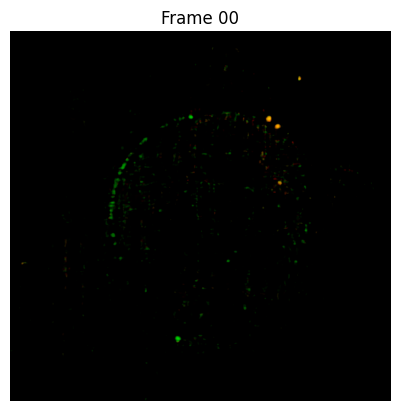

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [9]:
datafolder = '../Results/drying_beads_drop/'
save_loc = './Figures/drying_beads_drop/'
wvmin = 450
wvmax = 800
wvstep = 6
wavelengths = np.arange(wvmin,wvmax+wvstep,wvstep)

files = os.listdir(datafolder)
files.sort(key=lambda x: os.path.getctime(os.path.join(datafolder, x)))
print(files)

for k in range(len(files)):
    xk = np.load(os.path.join(datafolder, files[k]))
    HSI_data = np.transpose(xk, (1,2,0))
    HSI_data = np.reshape(HSI_data, [-1,xk.shape[0]])
    false_color = sdc_np.HSI2RGB(wavelengths, HSI_data ,xk.shape[1],xk.shape[2], 65, False)
    plt.imshow(false_color**1.5)
    plt.axis('off')
    frame = 'Frame '+str(k).zfill(2)
    plt.title(frame)
    plt.savefig(save_loc+'/frame_'+str(k).zfill(2)+'.png')
    plt.show()
    plt.close()


1.0

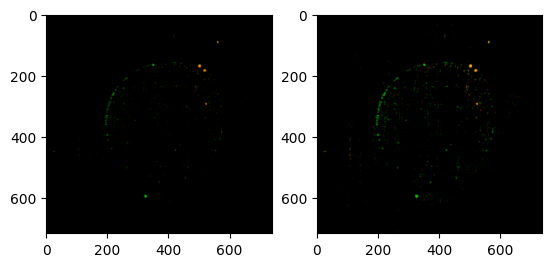

In [18]:
plt.subplot(1,2,1)
plt.imshow((false_color**1.5))
np.amax(false_color)
plt.subplot(1,2,2)
plt.imshow((false_color**1.0))
np.amax(false_color)

In [7]:
import cv2
import os

# Path to the directory containing the PNG files
png_folder = './Figures/drying_beads_drop'

# Path to save the output video
output_video = './output_video.mp4'

# Get the list of PNG files in the folder
png_files = [file for file in os.listdir(png_folder) if file.endswith('.png')]
png_files.sort()

# Read the first image to get the dimensions
first_image = cv2.imread(os.path.join(png_folder, png_files[0]))
height, width, _ = first_image.shape

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video, fourcc, 3.0, (width, height))

# Write each PNG file to the video
for png_file in png_files:
    image = cv2.imread(os.path.join(png_folder, png_file))
    video_writer.write(image)

# Release the VideoWriter object
video_writer.release()

In [8]:
# make video of measurements also
import cv2
import os

# Path to the directory containing the PNG files
datafolder = '/media/azuldata/neerja/2024-02-01/drying_beads_drop'
pattern = 'meas*.tiff'
import glob
# Use glob to find the matching files
files = glob.glob(os.path.join(datafolder, pattern))

# Path to save the output video
output_video = './drying_beads_meas.mp4'

# Read the first image to get the dimensions
first_image = cv2.imread(os.path.join(datafolder, files[0]))
height, width, _ = first_image.shape

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video, fourcc, 3.0, (width, height))

# Write each PNG file to the video
for f in files:
    image = cv2.imread(os.path.join(datafolder, f))
    video_writer.write(image)

# Release the VideoWriter object
video_writer.release()